In [1]:
%matplotlib inline
import pylab as plt
from Game import *
from Game.minimax import *
inf=1e500

Version:  0.3.03


In [2]:
def initial_state():
    state=Board(3,3)
    state.pieces=['.','X','O']
    # state[0]=1 in cases where we need to have starting pieces
    return state


# In[3]:


def valid_moves(state,player):
    
    # nope -- return [0,1,2,3,4,5,6,7,8]
    
    EMPTY=0
    X=1
    O=2
    
    moves=[]
    
    if state[0]==0:
        moves.append(0)
    if state[1]==0:
        moves.append(1)        
    if state[2]==0:
        moves.append(2)
        
    #....
    
    moves=[]
    for location in range(9):
        if state[location]==EMPTY:
            moves.append(location)
    
    
    return moves


# In[4]:


def update_state(state,player,move):
    
    new_state=state
    
    new_state[move]=player
    
    return new_state


# In[5]:


def three_in_a_row(a,b,c,player):
    
    if a==player and b==player and c==player:
        return True
    else:
        return False
    
    
    
def win_status(state,player):
    
    # 0 1 2
    # 3 4 5
    # 6 7 8
    
    if player==1:
        other_player=2
    else:
        other_player=1
    
    if three_in_a_row(state[0],state[1],state[2],player):
        return 'win'
    if three_in_a_row(state[3],state[4],state[5],player):
        return 'win'
    if three_in_a_row(state[6],state[7],state[8],player):
        return 'win'
    if three_in_a_row(state[0],state[3],state[6],player):
        return 'win'
    if three_in_a_row(state[1],state[4],state[7],player):
        return 'win'
    if three_in_a_row(state[2],state[5],state[8],player):
        return 'win'
    if three_in_a_row(state[0],state[4],state[8],player):
        return 'win'
    if three_in_a_row(state[2],state[4],state[6],player):
        return 'win'
    
    if not valid_moves(state,other_player):
        return 'stalemate'
    
    
def show_state(state):
    print(state)
    
    


# In[6]:


In [3]:
def walk(current_state,player,depth=0,counts={},maxdepth=inf):
    
    if player==1:
        other_player=2
    else:
        other_player=1

    if depth in counts:
        counts[depth]+=1
    else:
        counts[depth]=1
        
    if depth>maxdepth:
        return 
    

    # since win_status is called with a player and an updated state
    # the current state is really the updated state from the
    # other player's last move.

    status=win_status(current_state,other_player)
    if not status in ['win','lose','stalemate',None]:
        raise ValueError("Win status returned '%s' not valid.  Allowed values only in ['win','lose','stalemate',None]." % status)

    if status=='win':  # bad for min
        return
    elif status=='lose':  # good for min
        return
    elif status=='stalemate':  # draw
        return


    moves=valid_moves(current_state,player)
    if moves is None:
        raise ValueError("valid_moves returned None with state=%s and player=%d - Did you forget to return the moves?" % (str(current_state),player))
    available_states=[update_state(deepcopy(current_state),player,move)
                                for move in moves]
    
    values=[]
    for state in available_states:
        walk(state,other_player,depth+1,counts,maxdepth)
        

In [4]:
def node_pos(current_state,player,depth=0,width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5,root=None,
            pos = None, parent = None,connections=[],all_states={}):
    
    if player==1:
        other_player=2
    else:
        other_player=1

    # since win_status is called with a player and an updated state
    # the current state is really the updated state from the
    # other player's last move.

    status=win_status(current_state,other_player)
    if not status in ['win','lose','stalemate',None]:
        raise ValueError("Win status returned '%s' not valid.  Allowed values only in ['win','lose','stalemate',None]." % status)

    if pos is None:
        pos = {0:[xcenter,vert_loc]}
        all_states[0]=current_state
        root=0
    else:
        pos[root] = [xcenter, vert_loc]
        
    if not connections:
        connections=[]
        
        
        
    if status=='win':  # bad for min
        all_states[root]=current_state,True
        return pos,connections,all_states
    elif status=='lose':  # good for min
        all_states[root]=current_state,True
        return pos,connections,all_states
    elif status=='stalemate':  # draw
        all_states[root]=current_state,True
        return pos,connections,all_states
    else:
        all_states[root]=current_state,False

    
    moves=valid_moves(current_state,player)
    if moves is None:
        raise ValueError("valid_moves returned None with state=%s and player=%d - Did you forget to return the moves?" % (str(current_state),player))
    available_states=[update_state(deepcopy(current_state),player,move)
                                for move in moves]
    
    if available_states:
        dx = width/len(available_states) 
        nextx = xcenter - width/2 - dx/2
        for state in available_states:
            nextx += dx
            connections.append( [len(pos),root])
            pos,connections,all_states = node_pos(state,other_player,depth+1, width = dx, vert_gap = vert_gap, 
                                vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                pos=pos, parent = root,root=len(pos),connections=connections,all_states=all_states)
    return pos,connections,all_states


In [5]:
def spread(pos):
    level=1
    
    while True:
    
        yl=.1-.2*level,.1-.2*(level+1)
        y=plt.array([pos[key][1] for key in pos])

        keys=list(pos.keys())

        idx=plt.where((y<=yl[0]) & (y>=yl[1]))[0]

        if not len(idx):
            break


        x=plt.array([pos[keys[i]][0] for i in idx])
        y=plt.array([pos[keys[i]][1] for i in idx])

    
        x=plt.linspace(0,1,len(x))
        for i,xx in zip(idx,x):
            key=keys[i]
            pos[key][0]=xx
    
        level+=1
        
def spread2(pos,minx=0.07):
    level=1
    
    while True:
    
        yl=.1-.2*level,.1-.2*(level+1)
        y=plt.array([pos[key][1] for key in pos])

        keys=list(pos.keys())

        idx=plt.where((y<=yl[0]) & (y>=yl[1]))[0]

        if not len(idx):
            break


        x=plt.array([pos[keys[i]][0] for i in idx])
        y=plt.array([pos[keys[i]][1] for i in idx])

        for i in range(1,len(x)):
            dx=minx-(x[i]-x[i-1])
            if dx>0:
                x[i:]=x[i:]+dx
        
        for i,xx in zip(idx,x):
            key=keys[i]
            pos[key][0]=xx
    
        level+=1        

In [6]:
state=initial_state()
state[1]=1
state[2]=2
state[3]=1
state[4]=2
state[5]=1

## First plot just end states then the rest

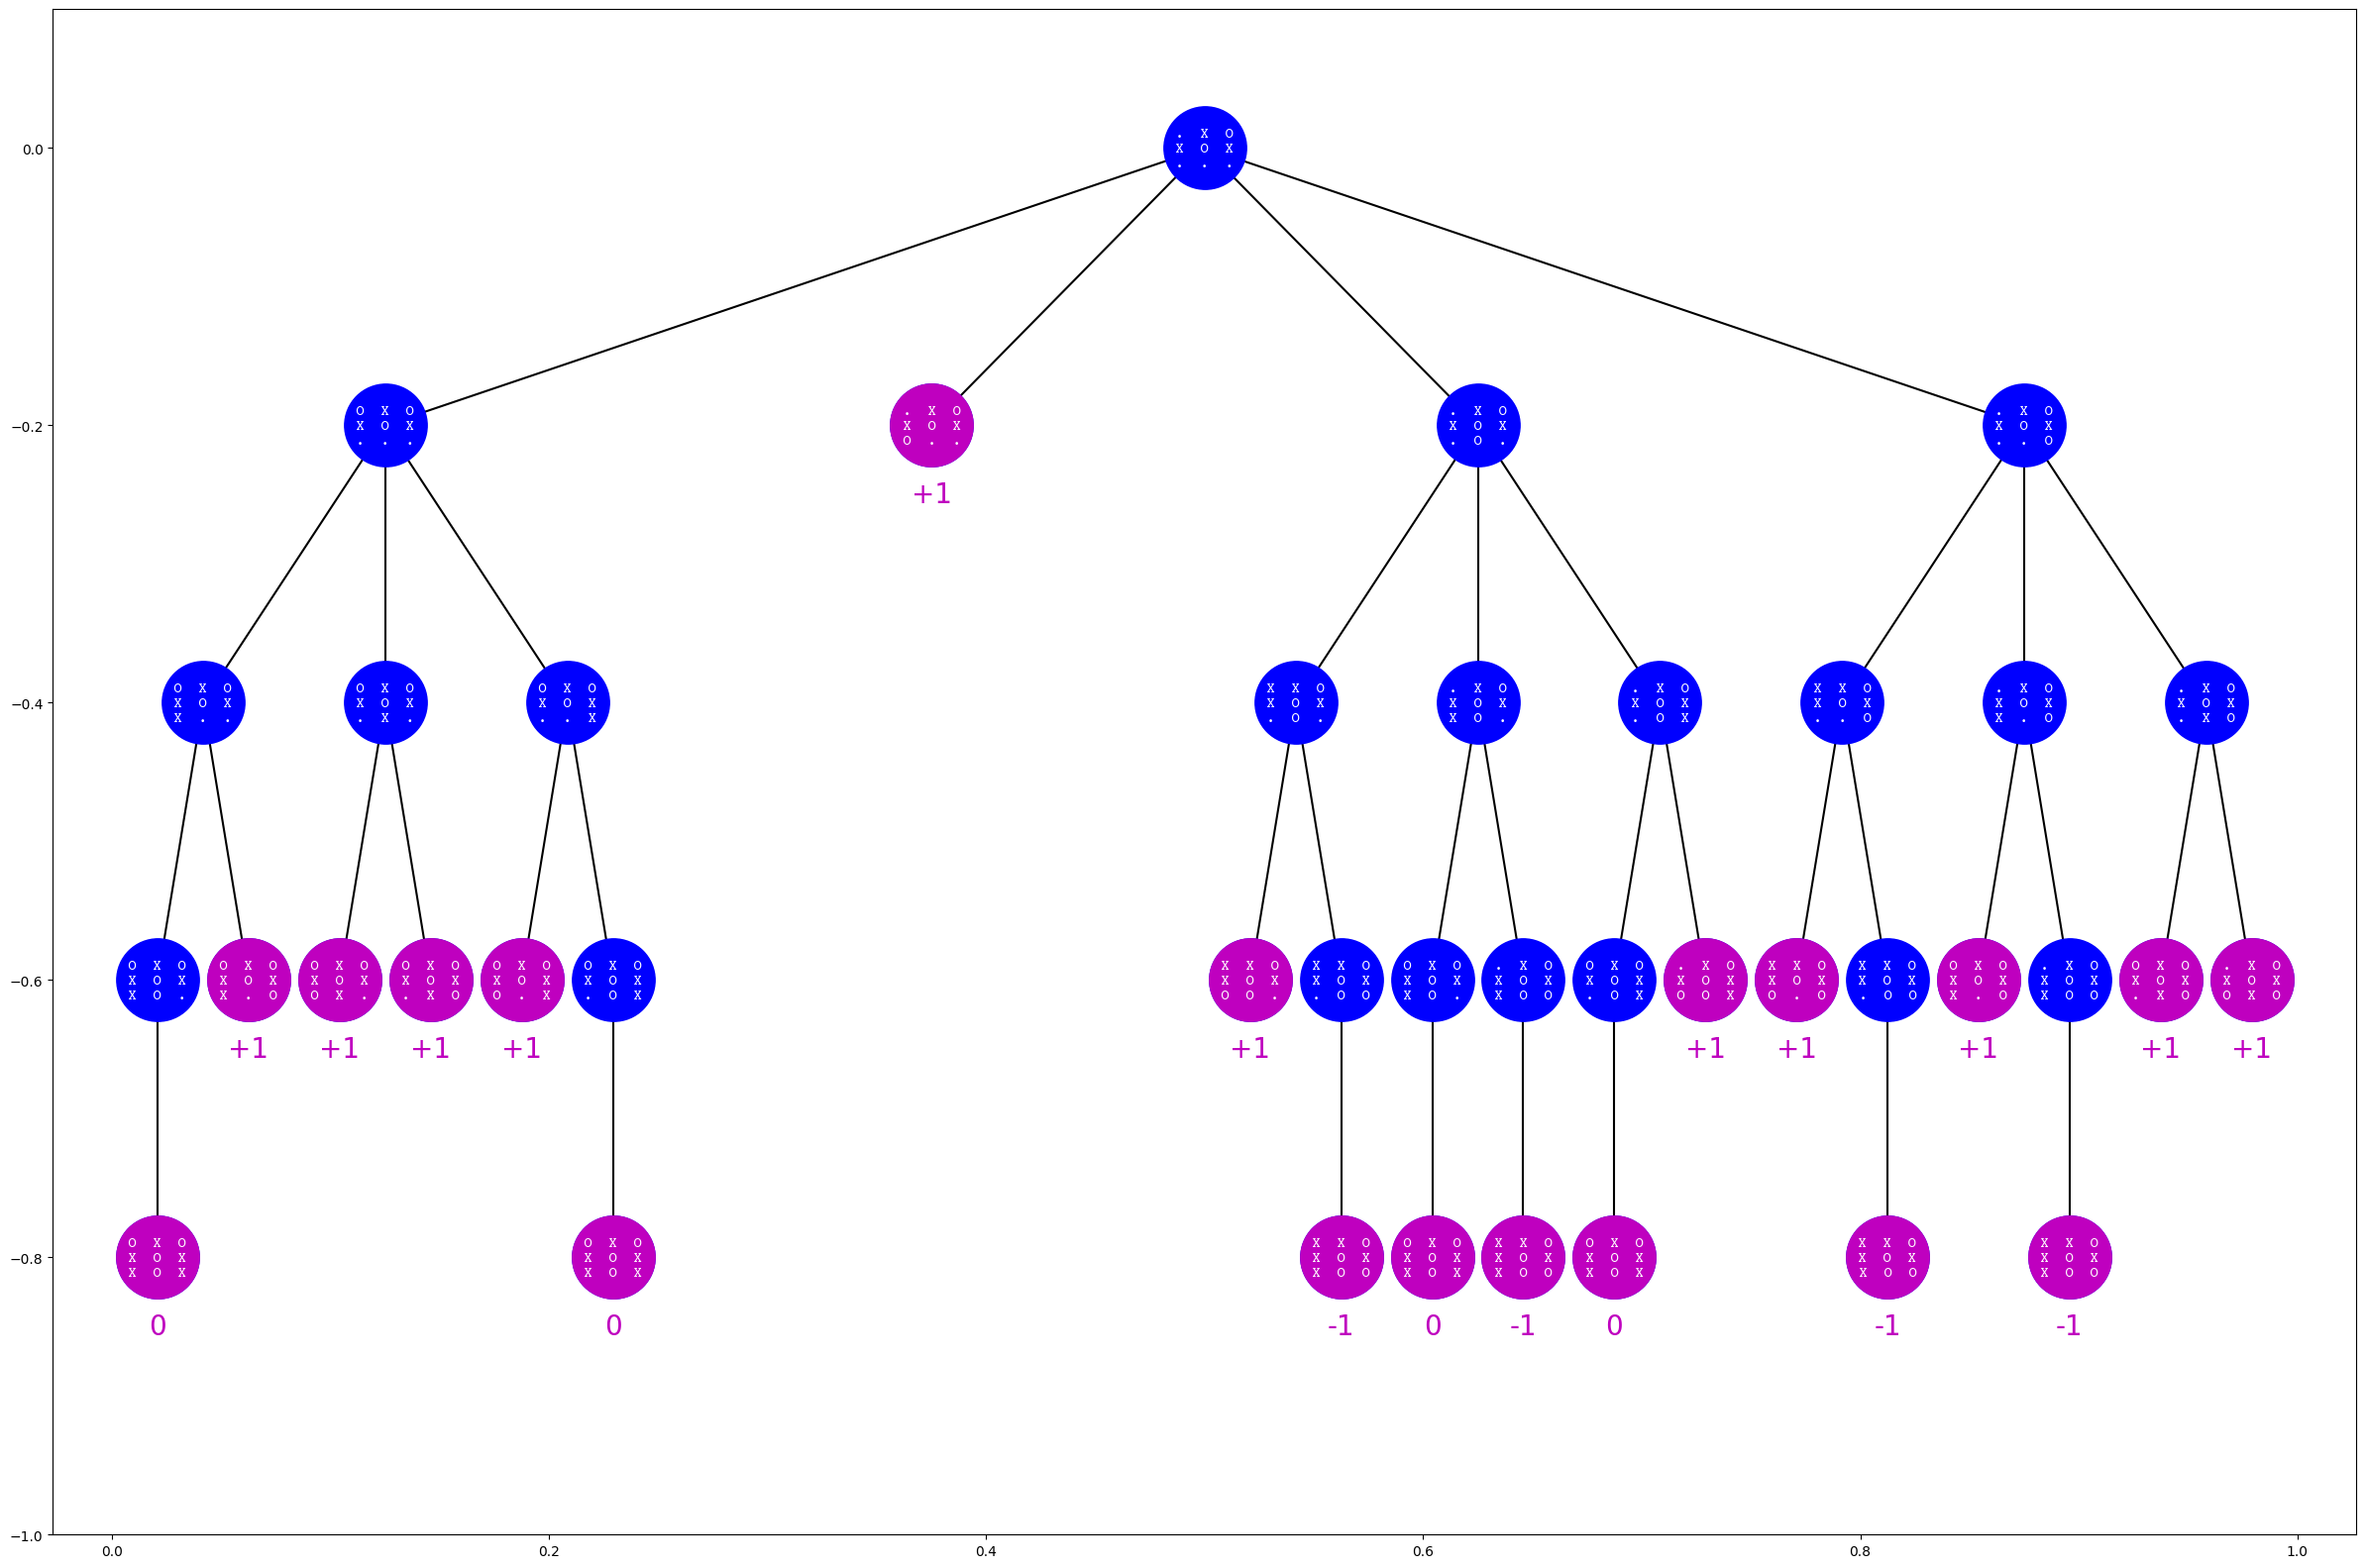

In [7]:
plt.figure(figsize=(30,20))
pos,conn,states=node_pos(state,2)

#spread(pos)



x=plt.array([pos[key][0] for key in pos])
y=plt.array([pos[key][1] for key in pos])

for start,end in conn:
    if end is None:
        continue
    x1,y1=pos[start]        
    x2,y2=pos[end]        
    plt.plot([x1,x2],[y1,y2],'k-')

plt.plot(x,y,'bo',ms=60)


for key in pos:
    x,y=pos[key]
    depth=int(round(y/-0.2))
    

    
    if states[key][1]:
        plt.plot(x,y,'mo',ms=60)
        value=str(maxvalue(states[key][0],2))
        if value=='1':
            value='+1'
        plt.text(x,y-.05,value,color='m',va='center',ha='center',size=20)
    else:
        if depth%2==0:
            value=str(maxvalue(states[key][0],2))
        else:
            value=str(minvalue(states[key][0],1))
        if value=='1':
            value='+1'
        #plt.text(x+.02,y-.05,value,color='b',va='center',ha='center',size=20)
    plt.text(x,y,str(states[key][0]).rstrip('\n'),fontfamily='courier',va='center',ha='center',color='white')

    plt.ylim([-1,.1])
        

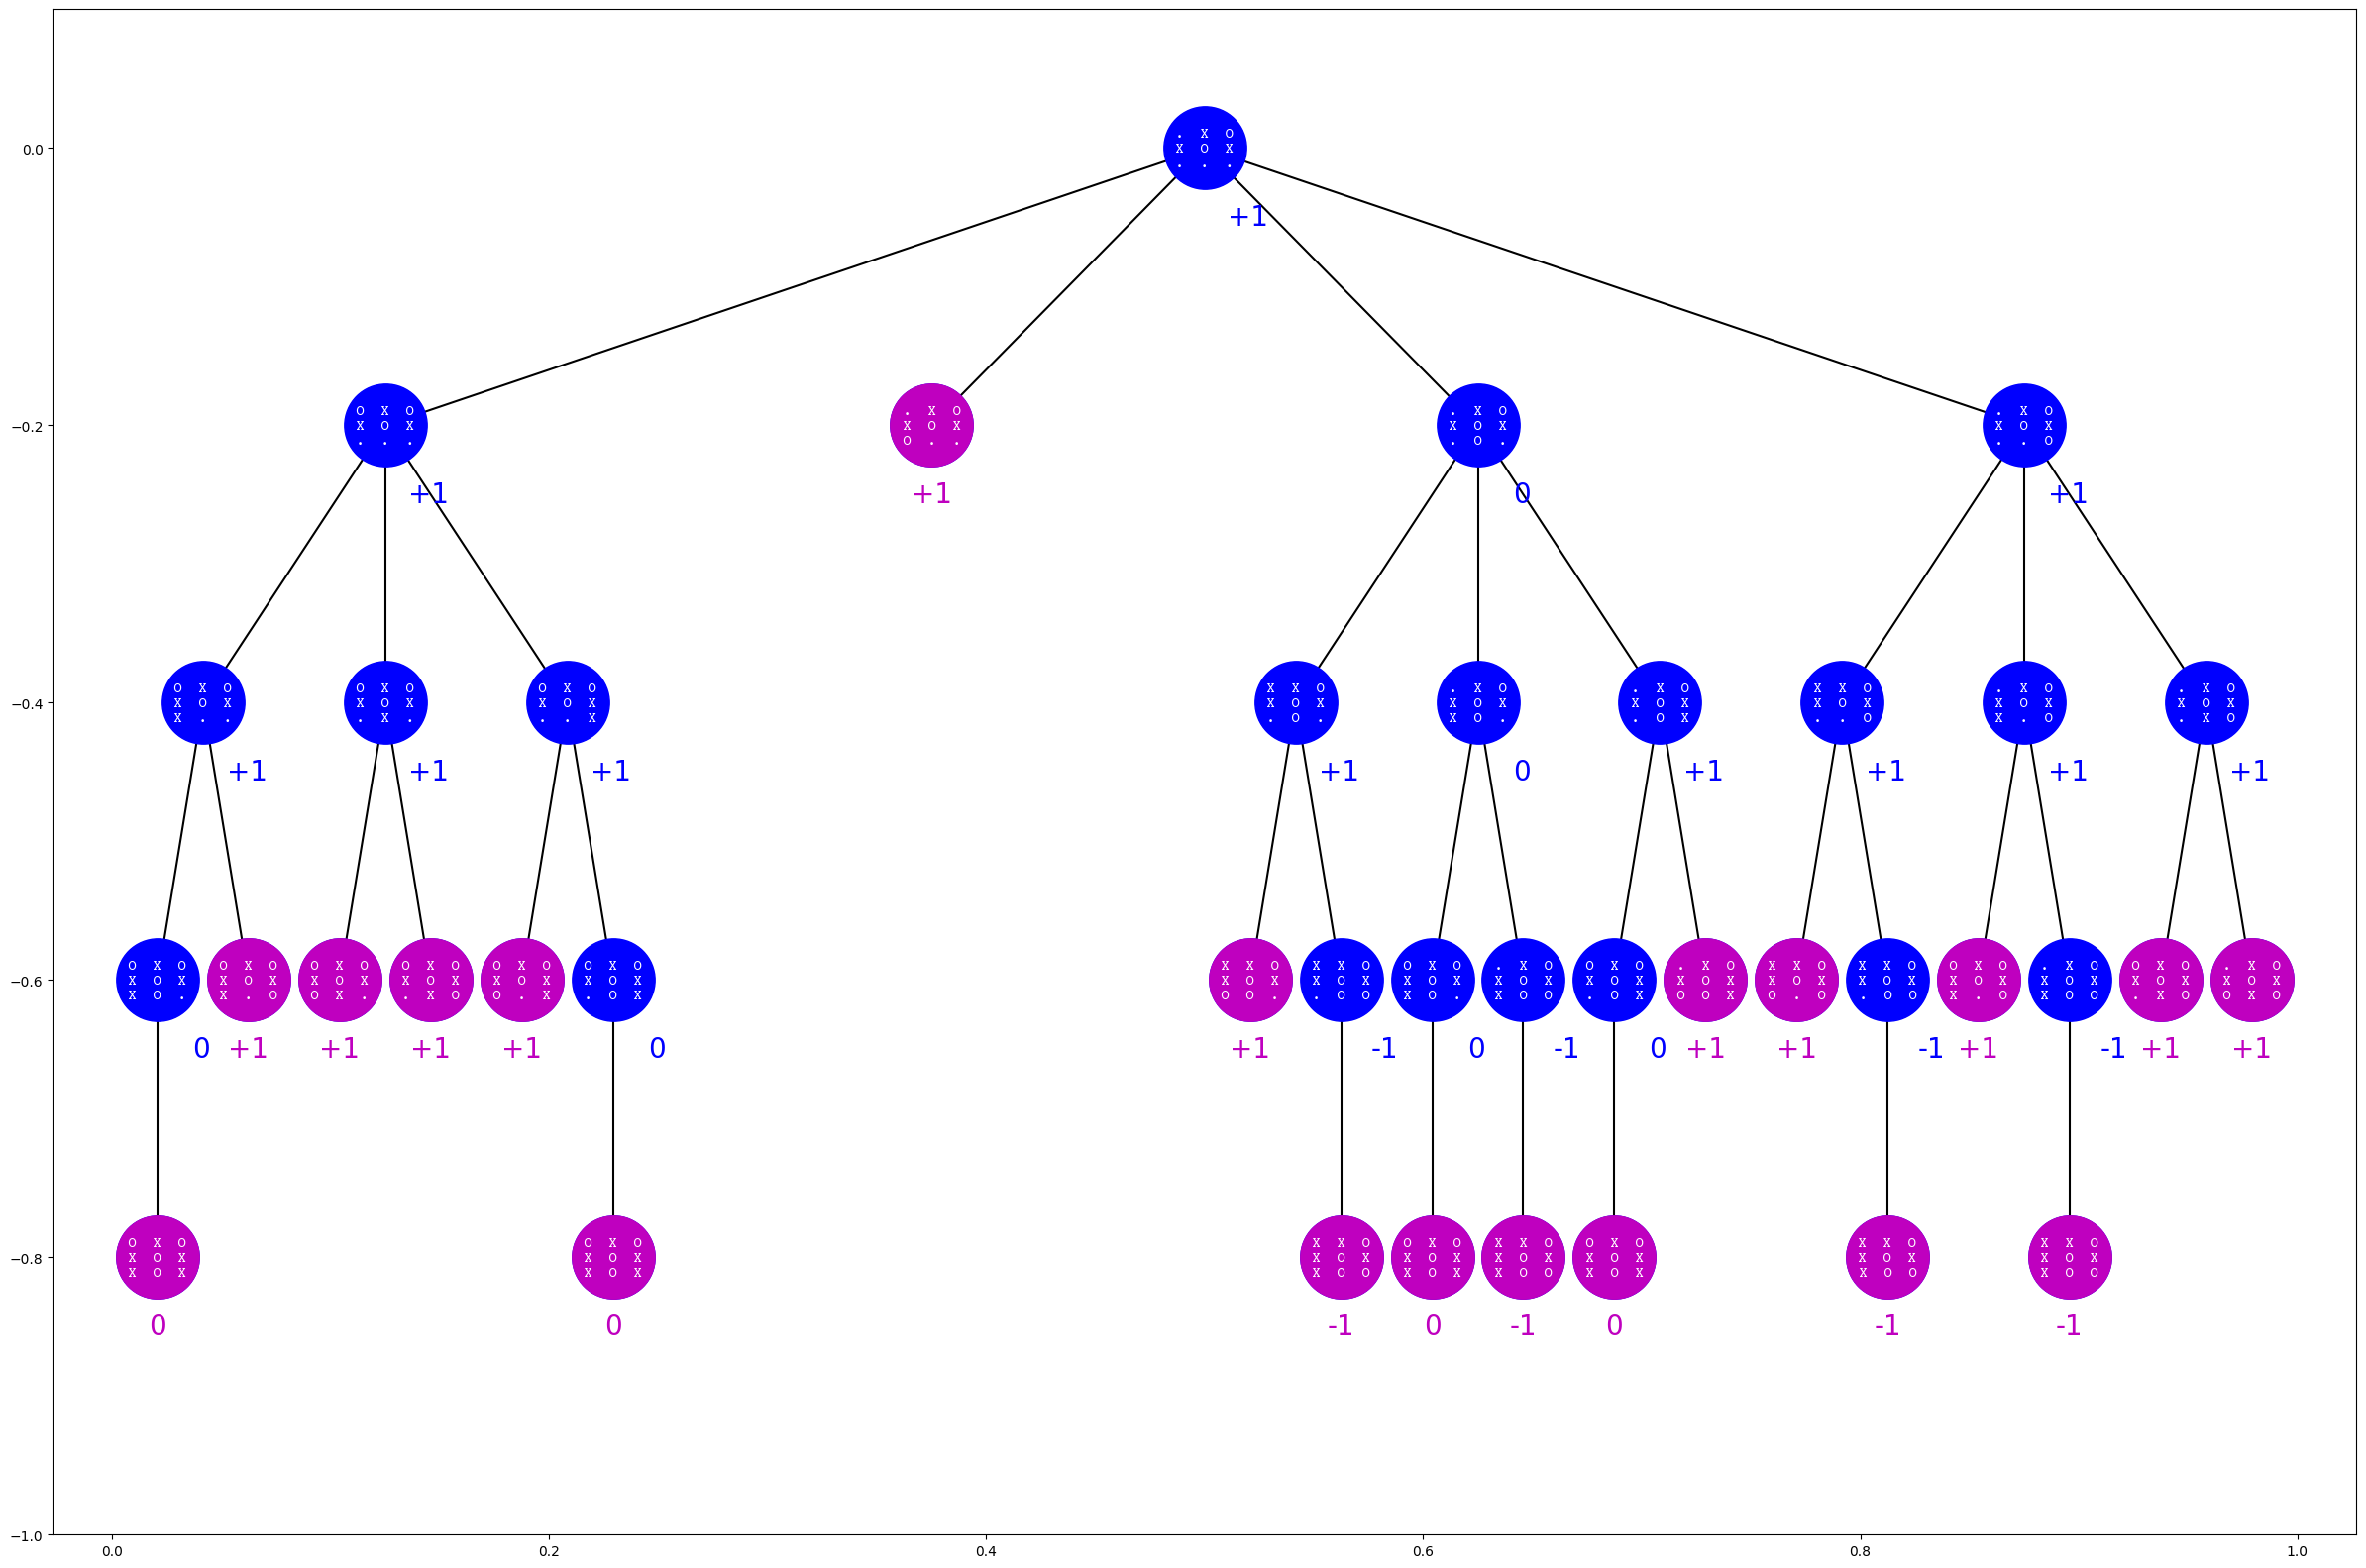

In [8]:
plt.figure(figsize=(30,20))
pos,conn,states=node_pos(state,2)

#spread(pos)



x=plt.array([pos[key][0] for key in pos])
y=plt.array([pos[key][1] for key in pos])

for start,end in conn:
    if end is None:
        continue
    x1,y1=pos[start]        
    x2,y2=pos[end]        
    plt.plot([x1,x2],[y1,y2],'k-')

plt.plot(x,y,'bo',ms=60)


for key in pos:
    x,y=pos[key]
    depth=int(round(y/-0.2))
    

    
    if states[key][1]:
        plt.plot(x,y,'mo',ms=60)
        value=str(maxvalue(states[key][0],2))
        if value=='1':
            value='+1'
        plt.text(x,y-.05,value,color='m',va='center',ha='center',size=20)
    else:
        if depth%2==0:
            value=str(maxvalue(states[key][0],2))
        else:
            value=str(minvalue(states[key][0],1))
        if value=='1':
            value='+1'
        plt.text(x+.02,y-.05,value,color='b',va='center',ha='center',size=20)
    plt.text(x,y,str(states[key][0]).rstrip('\n'),fontfamily='courier',va='center',ha='center',color='white')

    plt.ylim([-1,.1])
        

In [35]:
minvalue(states[key][0],2)


-1